# Buoyancy using a mesh

Buoyancy can be derived directly from a panel-model. This provides a realistic and fully non-linear buoyancy.
Any .obj file can be used a panel-model. See the appendix for more information on .obj files.

This example demonstrates how to make a pyramid-shaped iceberg. The pyramid mesh is one of the standard primitives.

We will first calculate the center of gravity of the iceberg by fully submerging it and then obtaining the displacement and cob.

Then we will make a rigid-body with that mass and cog and use the pyramid as a buoyancy mesh for it.

But first the two standard lines:

In [1]:
from DAVE.scene import *
from DAVE.jupyter import *

Equilibrium-core version = 1.0
default resource folders:
C:\Users\beneden\Miniconda3\envs\dave\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
Blender found at: C:\Program Files\Blender Foundation\Blender 2.83\blender.exe


### Determine the center of gravity of homogeneous solid

Buoyancy calculation can be used to determine the volume and center of volume of a mesh. Here we will use that to determine the mass and cog of the iceberg.

We do this by attaching a buoyancy node to a sub-sea axis.

In [2]:
s = Scene()

In [3]:
s.new_axis('subsea',position=(0,0,-25))

subsea <'DAVE.scene.Axis>

The mesh of a buoyancy node is accessible via the .trimesh property.

.trimesh.load_obj can be used to load a .obj file.

A buoyancy mesh can be given a scale, offset and rotation, just like visuals.

In [4]:
b = s.new_buoyancy('pyramid', parent='subsea')
b.trimesh.load_obj(s.get_resource_path(r'pyramid.obj'), scale = (10,10,10))

In [5]:
s.new_visual('pyramid_visual', parent='subsea', path=s.get_resource_path(r'pyramid.obj'), scale = (10,10,10))

pyramid_visual <'DAVE.scene.Visual>

Solve model to update buoyancy calculation

In [6]:
s.solve_statics()

Solved to 0.0.


True

Buoyancy objects are plotted using a transparent color.  
The source geometry is shown in yellow.  
The meshed submerged volume is shown using blue lines.  
The center of buoyancy is shown as a sphere.


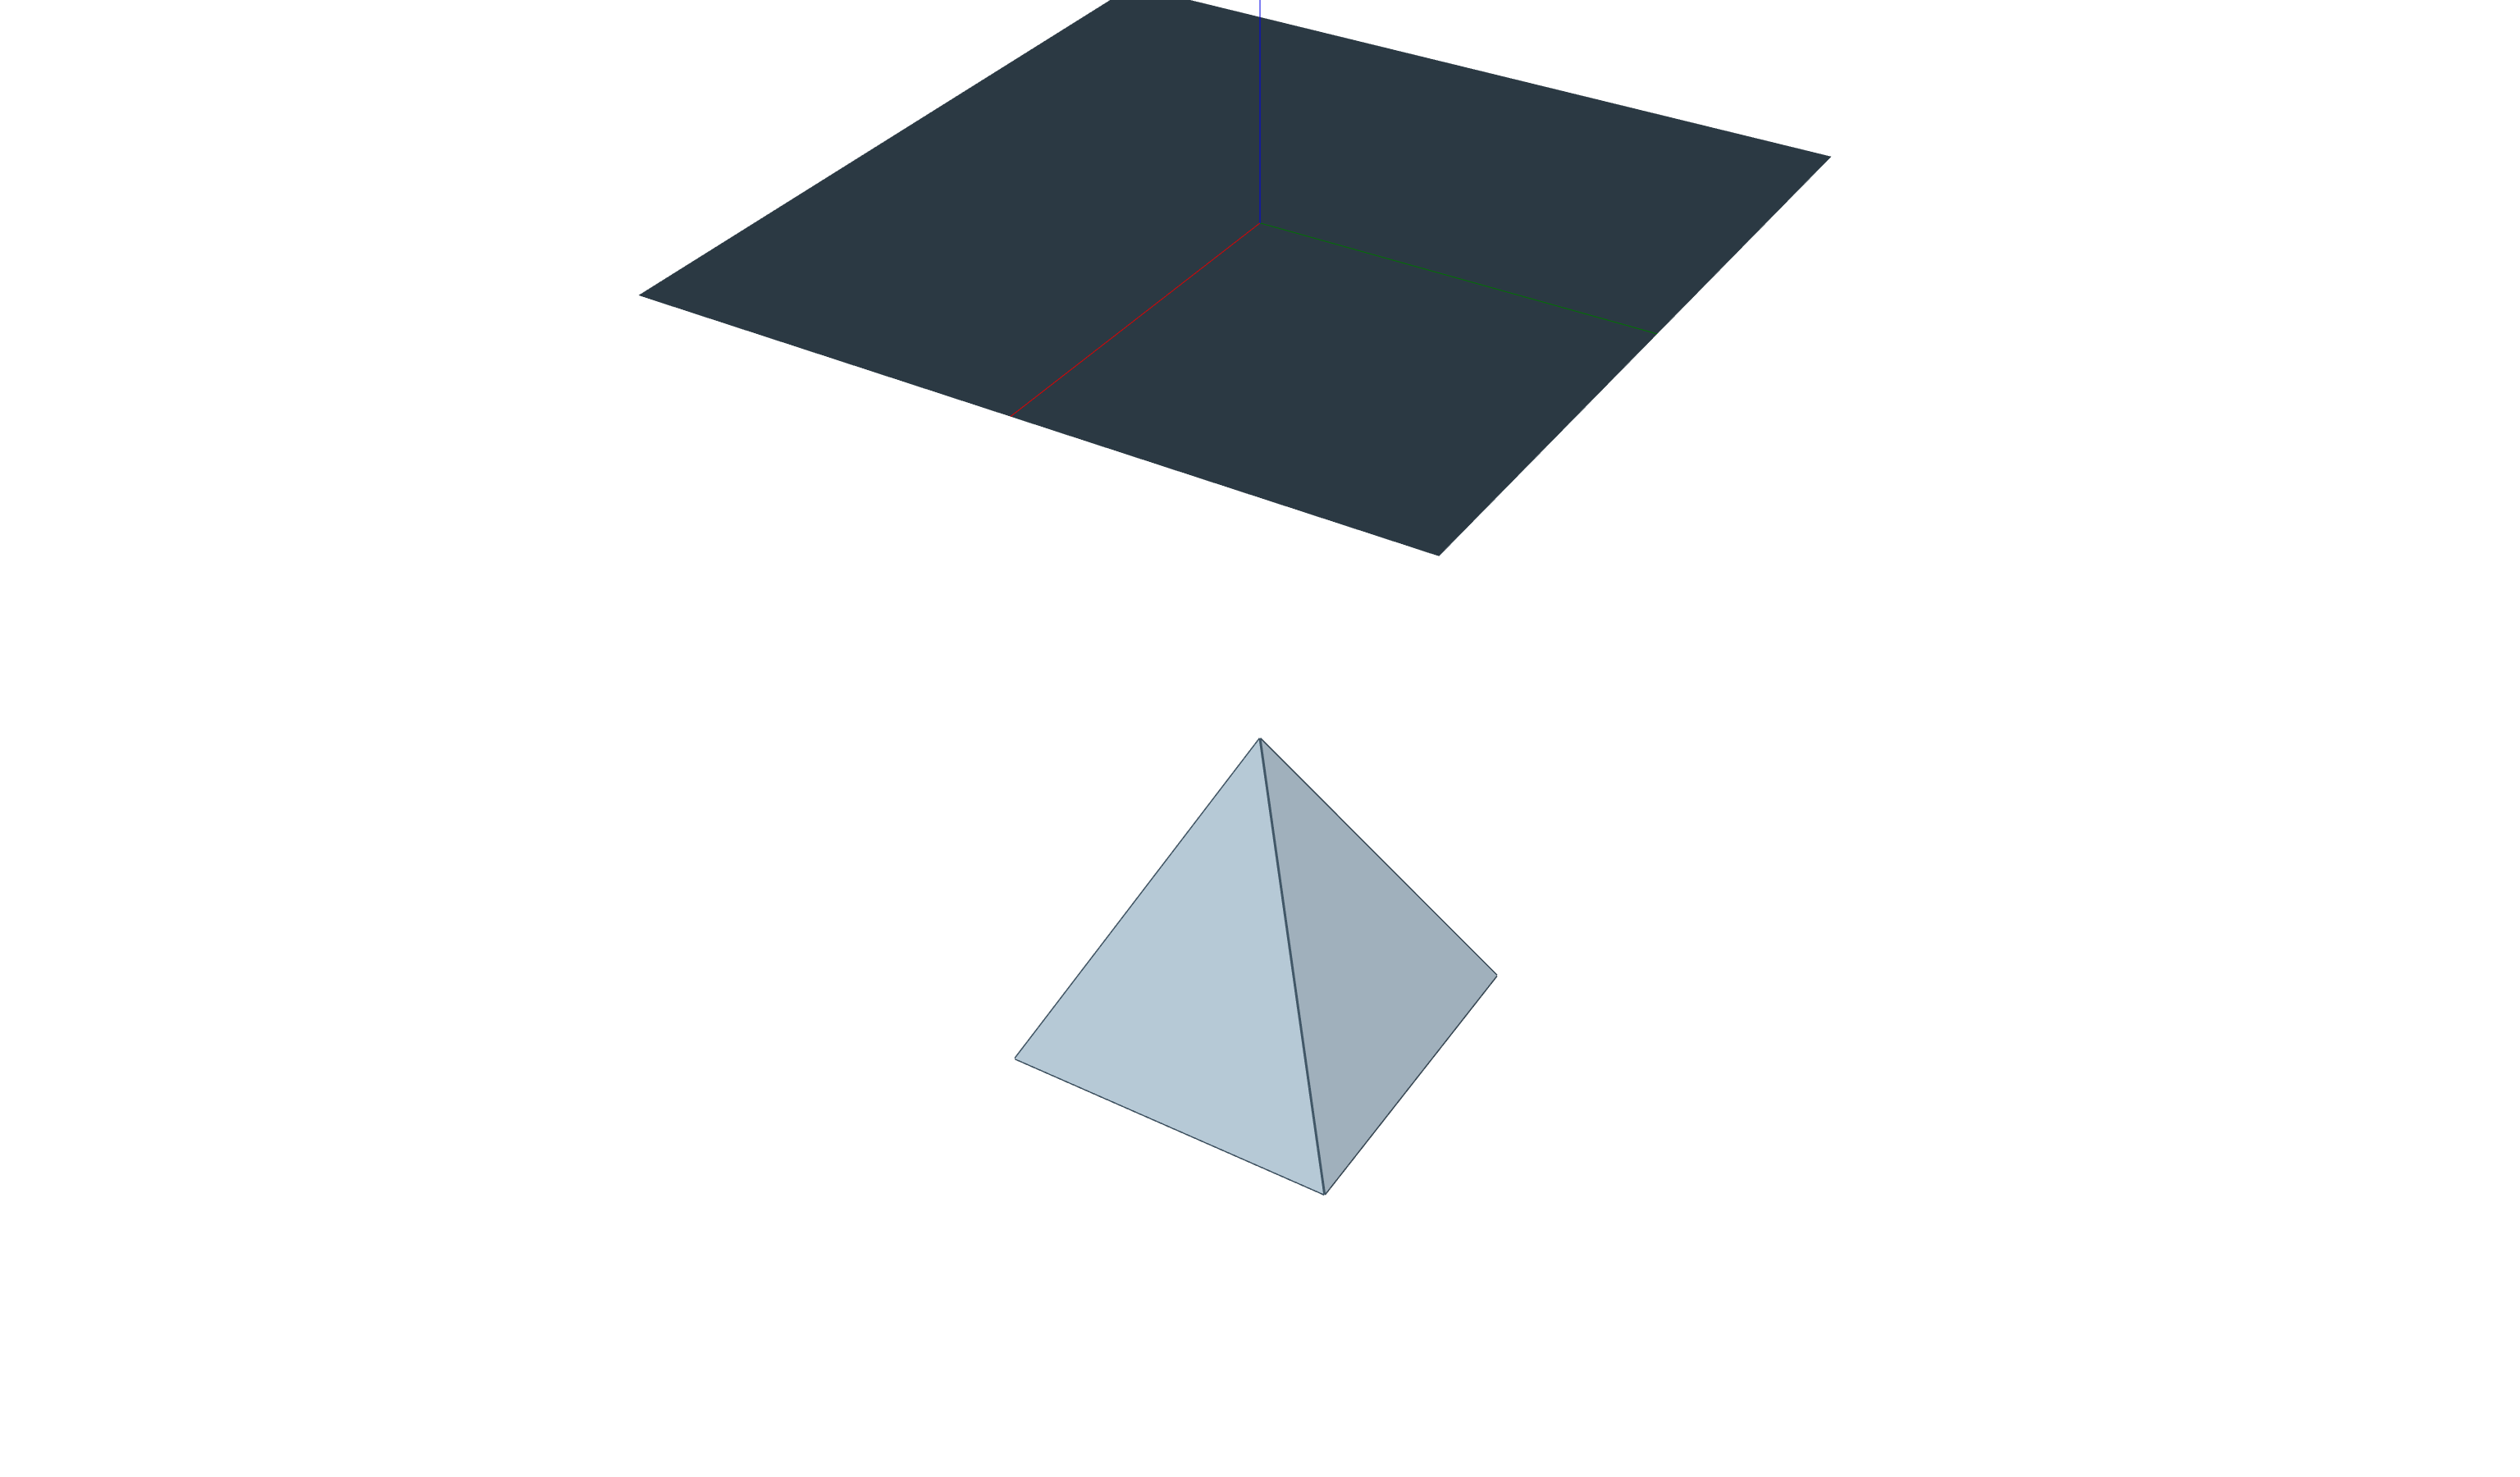

In [8]:
show(s, sea=False, camera_pos = (50,30,30), lookat= (0,0,-15))

Now calculate the mass properties of the "iceberg" from the displaced water.

In [9]:
cob_global = b.cob       # Note: this is the global position of the cob
volume = b.displacement

print("COB-position = {} {} {} (global)".format(*cob_global))   # note, the * is needed to expand the 
                                                                # tuple to three separate numbers
print("Volume = {} ".format(volume))

COB-position = 0.0 0.0 -22.499999999999996 (global)
Volume = 333.33333333333337 


In [10]:
rho = 0.920 # mT/m3
mass = rho * volume
cog_local = s['subsea'].to_loc_position(cob_global) # alternatively we could also have added +25 from the z-position

print("Mass = {}".format(mass))
print("CoG = {} {} {}".format(*cog_local))

Mass = 306.66666666666674
CoG = 0.0 0.0 2.5000000000000036


## Make the iceberg

Now that we know the CoG and mass we can create the iceberg. The iceberg is a rigid-body with a buoyancy-node attached to it.

In [11]:
iceberg = s.new_rigidbody('Iceberg', cog = cog_local, mass = mass, fixed=False)

In [12]:
b.parent = iceberg
s['pyramid_visual'].parent = iceberg

In [13]:
s.delete('subsea')  # we do not need the subsea axis anymore, so keep it clean and remove it.

Deleting subsea [Axis]


In [14]:
s.print_node_tree()

Iceberg [RigidBody]
 |-> pyramid [Buoyancy]
 |-> pyramid_visual [Visual]


In [15]:
s.solve_statics()

Solved to 4.347248250269331e-08.


True

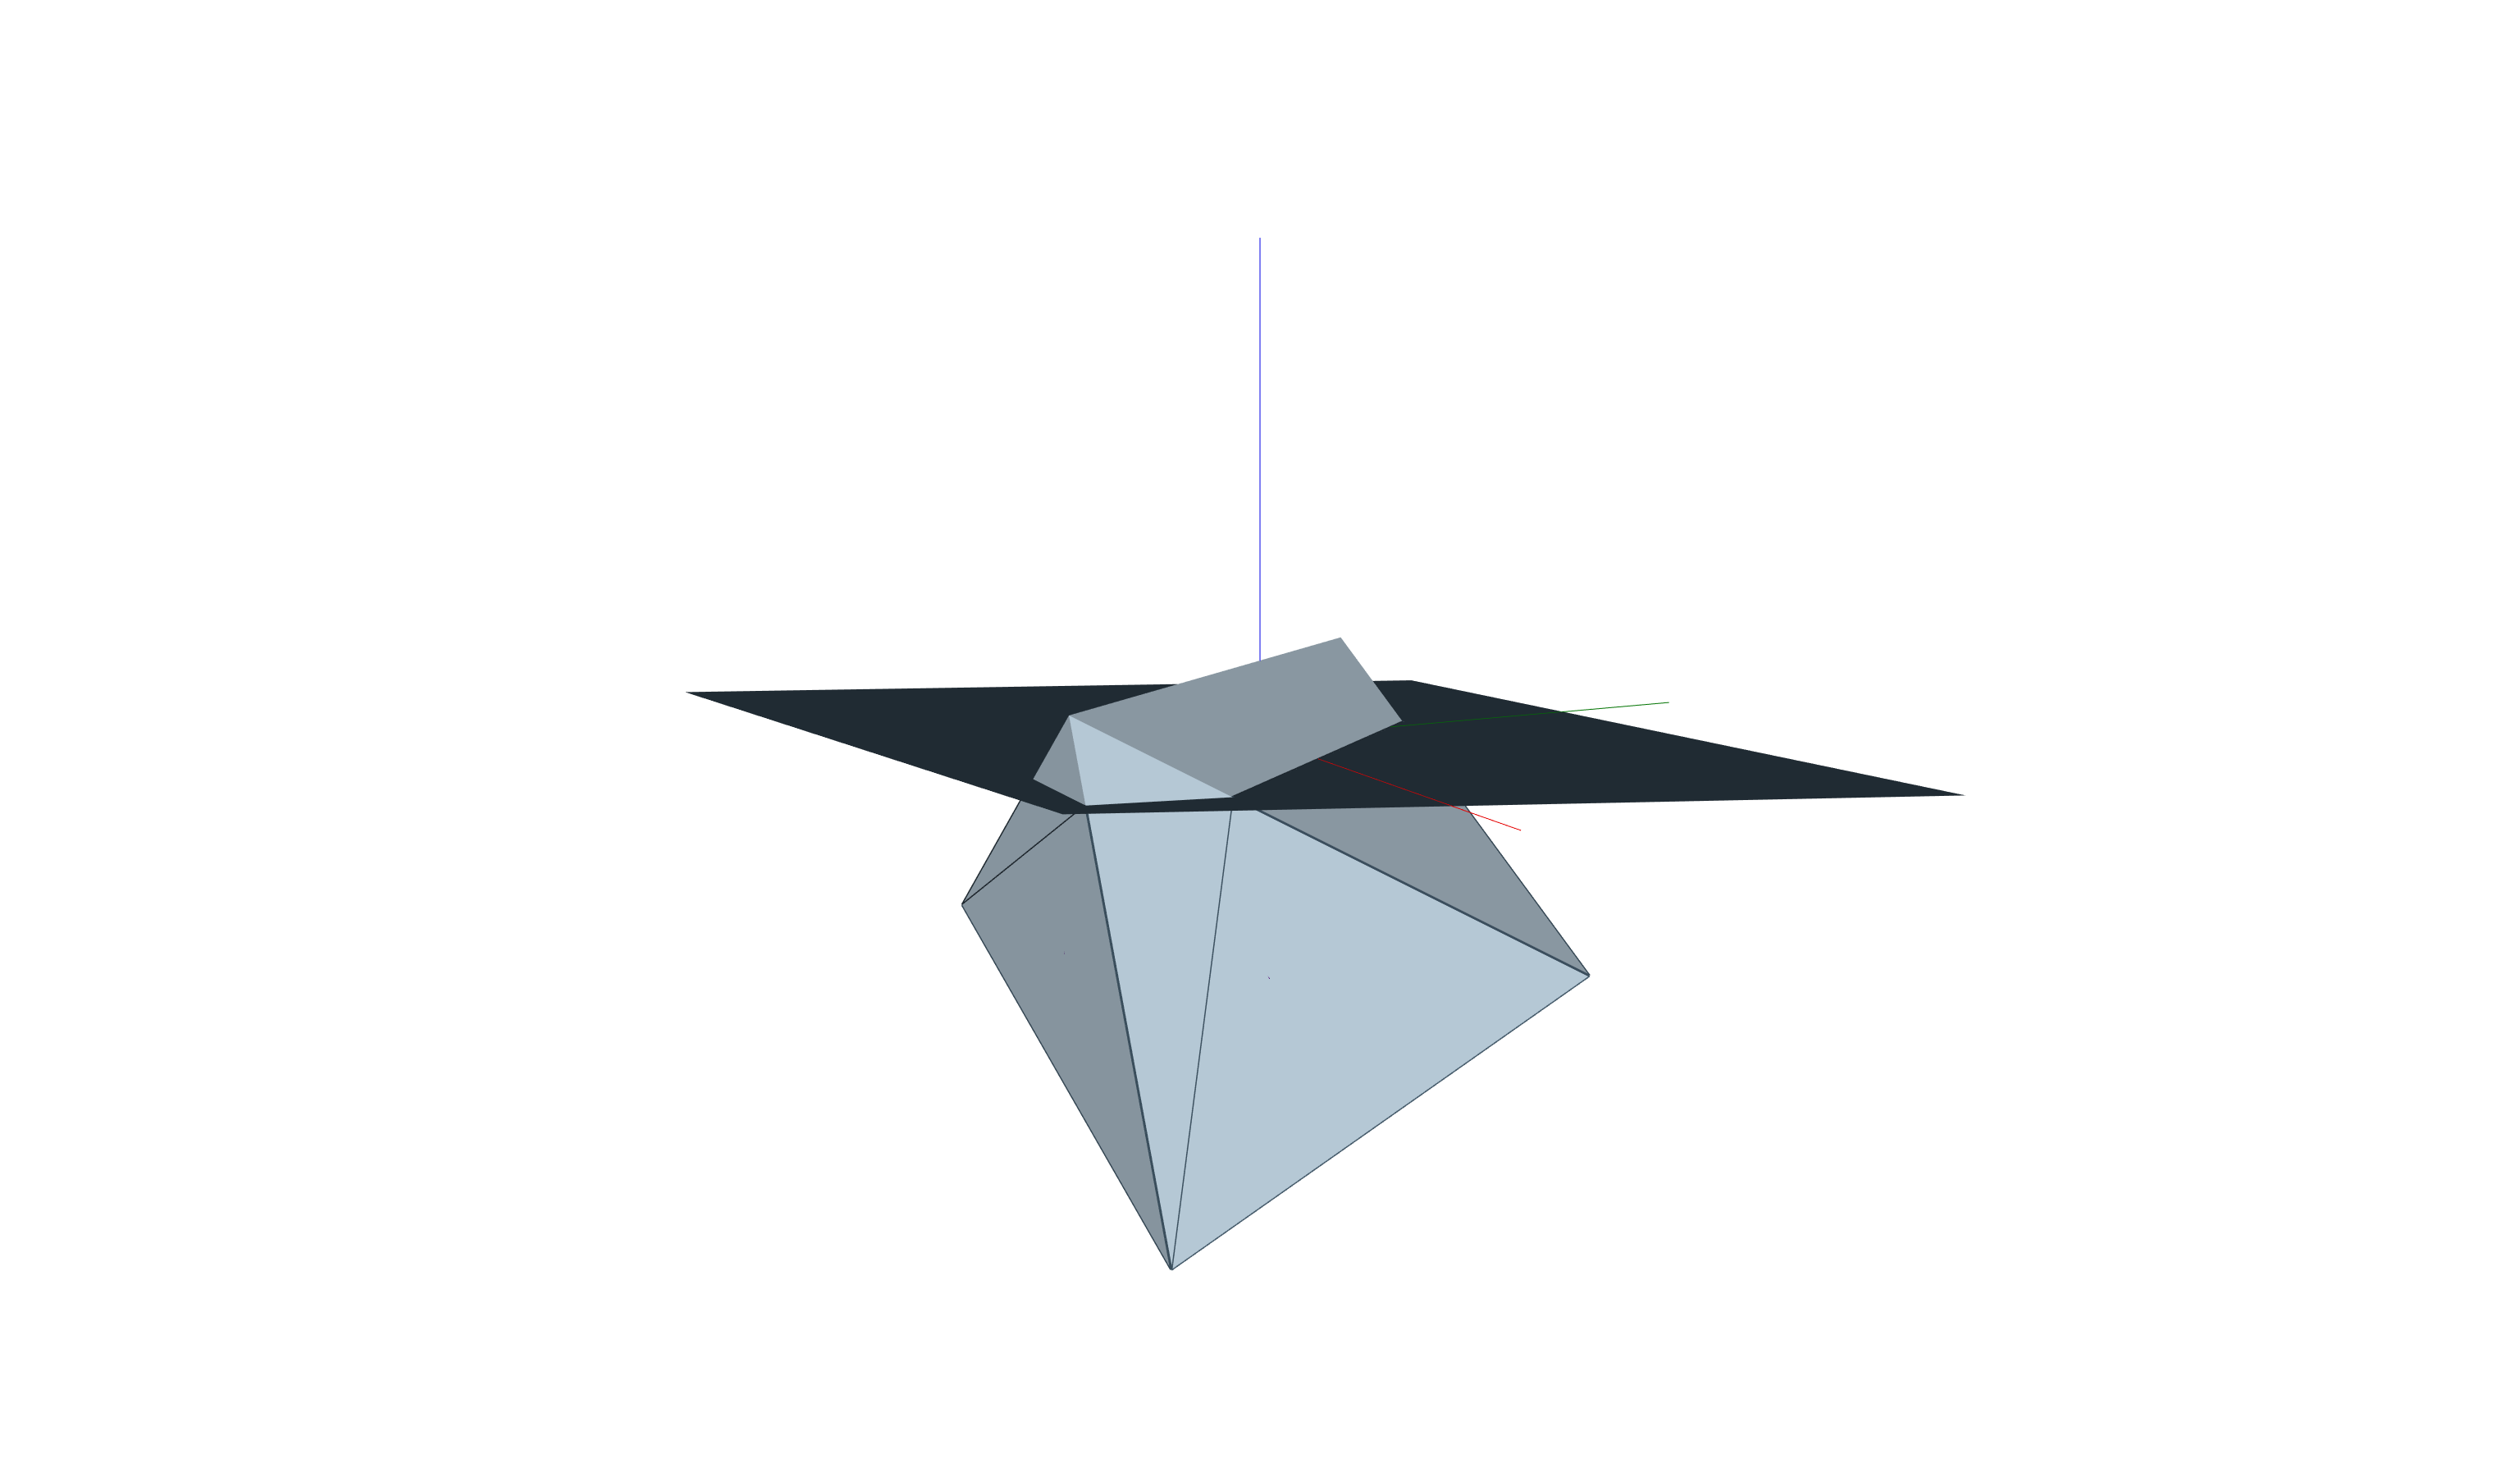

In [16]:
show(s, sea=False)

Done !

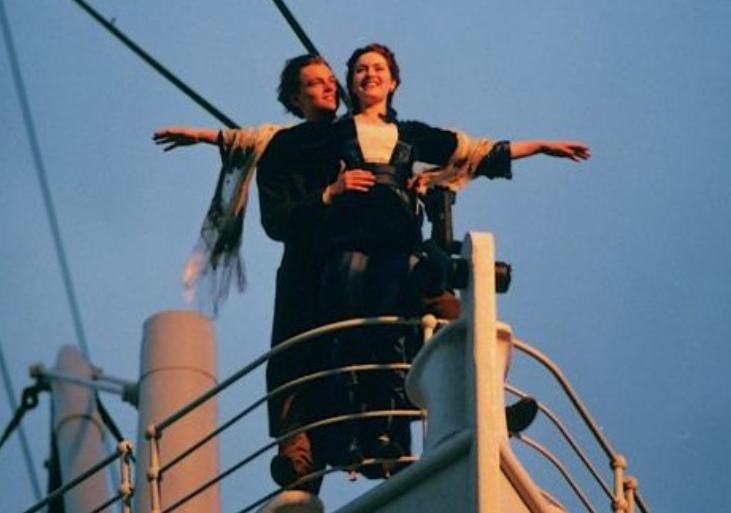

## Summary

A "Buoyancy" node can be use to add shape-based buoyancy to a scene.  
Such a node has an axis or rigid-body as parent  
CoB position and displacement are available as properties  
Any .obj file can be used a mesh  



## ANY .obj?

Yes, ANY .obj file can be used as buoyancy-shape.

In [23]:
s = Scene()
s.new_rigidbody('Seal',mass = 30, cog = (0,0,-1), fixed=False)
b = s.new_buoyancy('Skin',parent='Seal')

In [24]:
b.trimesh.load_obj(s.get_resource_path(r'17919_Seal_baby_happy_V1.obj'))

In [25]:
s.solve_statics()

Solved to 4.0464814397012105e-06.


True

In [28]:
view(s, sea=False)

VTK(vtkWin32OpenGLRenderWindow, height=400, sizing_mode='fixed', width=682)

Just remember that the more complex the geometry the longer the calculations will take. Also make sure the shape is water-tight and the normals are facing outward.

# Appendix - Creating .obj files

Blender is an excellent, free 3d modelling program. For people with "old" blender experience: Blender version 2.80 (release July 2019) is a huge improvement in usa interface. So if you stopped using one of the old versions due to its steep learning curve, then give it another change.

Display normals:
1. go to edit mode
2. click the "Overlays" button (see cursor in image)

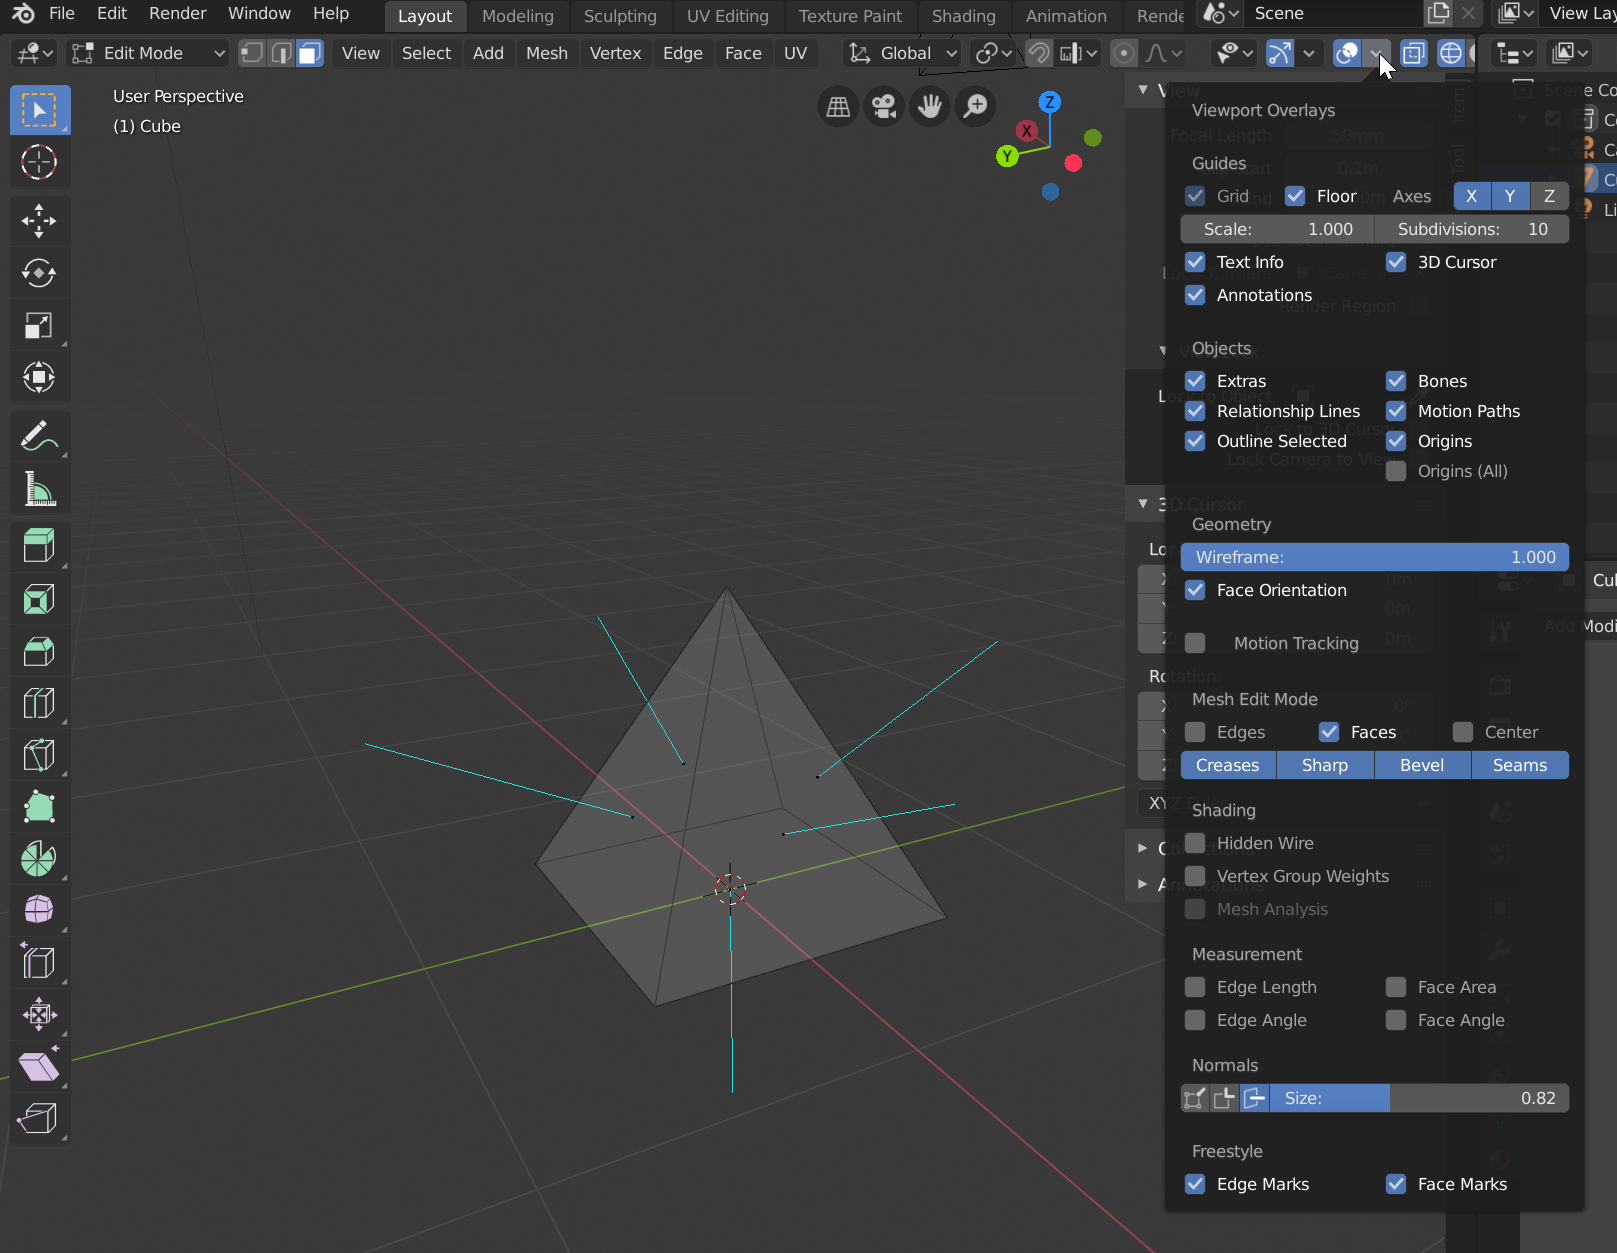

Exporting to .obj

Using the following coordinate settings makes the mesh compatible with the axis system of DAVE:

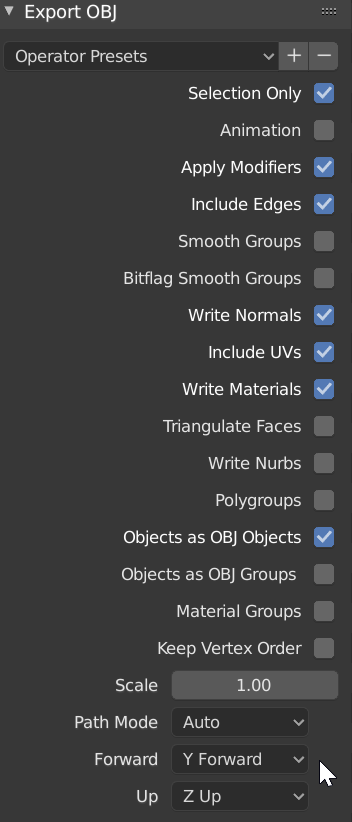